In [2]:
import requests
import time
import re
from bs4 import BeautifulSoup
from bs4 import UnicodeDammit
import http.cookiejar
import os 
import sys
import ijson
import io
from bson.code import Code
import json
import string
from datetime import datetime
from nltk.corpus import stopwords
from datetime import datetime
import re 
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
import re 
import pandas as pd
from pandas import DataFrame
import random
import numpy as np

## Parse and get the content of the news from the directory 

In [3]:
#a typical leftover thing : [<time class="timestamp__date" datetime="">Feb 13, 2020 7:47AM EST</time>]

In [4]:
paragraph_list=[]
date_list=[]
directory = os.getcwd() #get the local directory where the html file of news are 
for filename in os.listdir(directory):
    paragraph=""
    if filename.endswith('.htm') == False:
        continue
    try:
        with open(os.path.join(directory, filename), 'r',encoding="utf-8") as file:
            text = file.read()
            soup = BeautifulSoup(text, 'html.parser') 
            paragraphs = soup.findAll('p') #find paragraph tag 
        if not paragraphs:
            paragraph=None
        else:
            try:
                #datestamp
                datestr=soup.select('time[datetime]')[0]['datetime']
                clean_date=datestr[0:datestr.rfind('-')] #strip out the clean date time
                datetime_object = datetime.strptime(clean_date, '%Y-%m-%dT%H:%M:%S') #get only date 
                date_list.append(datetime_object.date()) 
                for el in paragraphs[1:]: #first <p> label is meaningless
                    if el.text=="The views and opinions expressed herein are the views and opinions of the author and do not necessarily reflect those of Nasdaq, Inc.":
                        break
                    paragraph=paragraph+el.text
                paragraph_list.append(paragraph)
            except:
                #Some news have null time tag 
                datestr=""
               
    except:
        print("file "+filename,sys.exc_info()[0])

In [5]:
##From previous scraping, there are 814 html file 
##but some are skipped bcs they don't have datetime stamp 
##This is to see if paragraph and date has maching number of items as they will be put into key-value pair in a dictionary later
print('There are ',len(paragraph_list),'paragraphs and',len(date_list),'date stamps')

There are  806 paragraphs and 806 date stamps


In [6]:
date_parag_pair=dict()
for pa in paragraph_list:
    i=paragraph_list.index(pa)
    date_parag_pair[date_list[i]]=pa
    
#choose a random sample to check
print(random.sample(date_parag_pair.items(),1)) 

[(datetime.date(2020, 2, 2), "China's top electric vehicle battery maker CATL said on Monday it has signed a battery supply agreement with Tesla.Adds background on TeslaSHANGHAI, Feb 3 (Reuters) - China's top electric vehicle battery maker CATL 300750.SZ said on Monday it has signed a battery supply agreement with Tesla TSLA.O.Tesla will determine the battery purchase volume between July 2020 and June 2022, according to its own needs, CATL said in a stock exchange filing, adding the agreement does not impose restrictions on Tesla's purchase volume.Tesla, which has a long-standing battery supply agreement with Japan's Panasonic Corp 6752.T, said during its earnings call last week that its pact with LG Chem 051910.KS and CATL was at a smaller scale.Tesla is building Model 3 vehicles from its $2 billion Shanghai factory, which started delivering cars last year, and has said it would diversify battery supplies for the plant.(Reporting by Yilei Sun and Brenda Goh; Editing by Kim Coghill and

## Sentiment Analysis

In [7]:
sums=[]
date_sentim_pair=dict()
for pa in paragraph_list:
    sum=0
    blob=TextBlob(pa)
    for sentence in blob.sentences:
        sentim=sentence.sentiment.polarity
        sum=sum+sentim
    i=paragraph_list.index(pa)
    sentim_avg=sum/len(blob.sentences) #sum of sentiment of a news paragraph devided by length of sentiment
    print(date_list[i])
    print(sentim_avg)
    #average sentiment of a news 
    date_sentim_pair[date_list[i]]=sentim_avg

2019-10-07
0.1498438056978621
2019-12-29
-0.02905844155844156
2019-10-23
0.02952482375462172
2020-02-06
0.201583167989418
2020-02-20
0.021428571428571432
2019-11-22
0.2023306477473144
2020-02-21
0.31813124375624374
2020-02-06
-0.05962962962962962
2019-10-02
0.04348169191919192
2019-10-23
0.02638037117203784
2019-10-24
0.08117283950617284
2019-11-21
0.05916666666666667
2019-10-24
0.05494447021232735
2019-10-03
-0.11574074074074076
2019-11-05
0.11325757575757577
2020-01-30
0.2825
2019-11-26
0.09165896804483761
2019-12-27
0.05652830387205388
2020-02-04
-0.019722222222222224
2020-01-08
0.18427272727272728
2020-02-03
0.039679487179487175
2020-02-10
0.26792478354978355
2019-11-22
0.10991961279461278
2020-01-17
0.18622804232804238
2020-02-07
-0.01636679292929293
2020-01-30
0.05105863833136559
2020-02-25
0.10920138625182484
2020-01-31
0.19494017556517557
2020-02-02
0.26666666666666666
2019-10-14
0.051112125721500715
2019-10-04
0.005402146464646462
2020-02-09
0.14932414204153333
2019-11-04
-0.0

2019-10-24
0.12842498003788327
2020-03-02
0.1773809523809524
2020-01-06
0.09217402196568864
2020-03-06
0.005648148148148152
2020-03-04
0.23308175505050505
2019-12-14
0.26076556885380403
2020-02-06
0.2007108350586611
2019-10-07
0.08007248827561328
2020-02-19
0.009645061728395068
2019-10-25
-0.06944444444444443
2019-10-10
0.013371933621933623
2020-02-20
0.024050671550671553
2020-01-22
0.052291005291005284
2019-10-23
-0.019047619047619046
2020-02-18
0.009645061728395068
2019-10-25
0.2558934486328966
2020-01-14
0.10945797258297259
2019-11-06
0.10695346320346322
2019-12-10
0.18604615394137453
2019-11-22
0.11297420634920634
2019-11-08
0.11454313543599257
2019-10-01
0.23032845461416887
2020-02-13
0.2458814333814334
2020-03-03
0.08887362637362638
2019-11-25
0.03784090909090909
2019-11-11
0.009645061728395068
2020-02-05
0.16413520837627985
2019-12-23
0.009645061728395068
2019-10-04
0.013751493428912779
2019-11-26
0.0861555034471701
2019-10-24
0.1830935846560847
2019-12-20
0.09586842105263157
20

2020-02-18
0.23382936507936508
2020-01-03
0.12212878787878786
2019-12-12
0.16342592592592595
2019-12-30
0.1287037037037037
2020-02-13
0.0561938431938432
2020-02-18
-0.02292618784057141
2020-01-17
0.125
2020-01-21
-0.04067085953878407
2019-11-08
0.06692132969910748
2020-02-04
0.057446145124716554
2019-10-23
0.08125448738253617
2020-02-05
0.24307142857142858
2020-01-22
0.06731078904991948
2020-01-21
0.06255555555555554
2019-11-22
0.11063581079814844
2019-12-30
-0.015113285634118975
2019-12-12
0.08043811897978564
2019-12-26
0.03250888133030991
2019-12-26
0.04763935652824542
2019-12-24
0.13053743961352657
2020-01-06
0.14703054353054354
2020-02-05
0.11607142857142853
2020-02-18
0.23382936507936508
2020-01-27
0.20087143759018758
2020-02-13
-0.08011904761904762
2019-10-22
0.10314703019781143
2019-10-28
0.08498602092352092
2019-11-06
0.21584498229043683
2020-02-16
0.17028485835304014
2020-02-05
0.03913354322445231
2020-01-07
0.0018521384053298922
2020-02-14
0.11023809523809523
2020-02-10
0.054

## Plots

#### Sentiment Plot

In [20]:
sentim=pd.DataFrame(date_sentim_pair.items())
sentim.rename(columns={0:"Date",1:"Sentiment"},inplace=True)
sentim=sentim.sort_values(by=['Date'])
sentim.head()

,Date,Sentiment
85,2019-10-01,0.050053
7,2019-10-02,0.000617
10,2019-10-03,0.186295
25,2019-10-04,0.037832
94,2019-10-05,0.187161


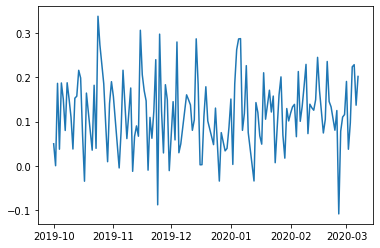

In [22]:
plt.plot("Date","Sentiment",data=sentim)

#### Stock price plot

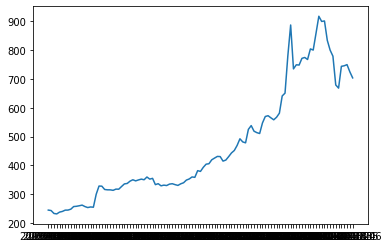

In [23]:
price=pd.read_csv('TSLA.csv') #Tesla data downloaded from Yahoo Finance
price_date=price['Date']
price_close=price['Close']
plt.plot('Date','Close',data=price)
plt.show()

## Merging sentiment with stock price for ML modeling

In [24]:
sentim.Date= pd.to_datetime(sentim.Date)
price.Date = pd.to_datetime(price.Date)
##merge news sentiment with price 
date_sentim_price = pd.merge(sentim,
                 price,
                 on='Date',how='right')
date_sentim_price=date_sentim_price.sort_values('Date')
date_sentim_price=date_sentim_price.fillna(0) #fillna so that all the days with price has sentim
date_sentim_price.head()

,Date,Sentiment,Open,High,Low,Close,Adj Close,Volume
0,2019-10-01,0.050053,241.500000,245.949997,239.130005,244.690002,244.690002,6162600
1,2019-10-02,0.000617,243.289993,244.649994,239.429993,243.130005,243.130005,5631400
2,2019-10-03,0.186295,231.860001,234.479996,224.279999,233.029999,233.029999,15084500
3,2019-10-04,0.037832,231.610001,234.779999,228.070007,231.429993,231.429993,7995000
4,2019-10-07,0.080072,229.800003,238.559998,228.550003,237.720001,237.720001,8064200


####  OPtional: adding twitter sentiment scraped from another project, which results in higher accuracy

In [25]:
##prepare twitter data 
twit=pd.read_csv('tweets_sentim_avg.csv')
twit_sentim=pd.DataFrame(twit[['date','retweet_count','num_tweets','avg_sentiment']])
twit_sentim.rename(columns={'date':"Date","avg_sentiment":"Twit_sentim_avg"},inplace=True)
twit_sentim.head()

,Date,retweet_count,num_tweets,Twit_sentim_avg
0,10/14/19,55,41,-0.00763
1,10/15/19,1,13,0.04002
2,10/16/19,5,4,0.13906
3,10/17/19,4,6,0.07273
4,10/18/19,0,1,0.37879


In [28]:
twit_sentim.Date= pd.to_datetime(twit_sentim.Date)
##merge twit sentiment with news sentiment and  price 
date_2sentim_price = pd.merge(date_sentim_price,
                 twit_sentim,
                 on='Date',how='left')
date_2sentim_price=date_2sentim_price.sort_values('Date') #sort date 
date_2sentim_price.rename(columns={'Sentiment':'News_Sentim_avg'},inplace=True)
#date_2sentim_price[date_2sentim_price.isna().any(axis=1)] # to see about null values 
date_2sentim_price=date_2sentim_price.fillna(0)
date_2sentim_price['Sentiment_newstwit']=date_2sentim_price['News_Sentim_avg']+date_2sentim_price['Twit_sentim_avg']
date_2sentim_price.head()

,Date,News_Sentim_avg,Open,High,Low,Close,Adj Close,Volume,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit
0,2019-10-01,0.050053,241.500000,245.949997,239.130005,244.690002,244.690002,6162600,0.0,0.0,0.0,0.050053
1,2019-10-02,0.000617,243.289993,244.649994,239.429993,243.130005,243.130005,5631400,0.0,0.0,0.0,0.000617
2,2019-10-03,0.186295,231.860001,234.479996,224.279999,233.029999,233.029999,15084500,0.0,0.0,0.0,0.186295
3,2019-10-04,0.037832,231.610001,234.779999,228.070007,231.429993,231.429993,7995000,0.0,0.0,0.0,0.037832
4,2019-10-07,0.080072,229.800003,238.559998,228.550003,237.720001,237.720001,8064200,0.0,0.0,0.0,0.080072


In [29]:
#Count proportion of positive news and negative news 

print("Percentage of positive news:",round(date_2sentim_price[date_2sentim_price.News_Sentim_avg>0].count()['Date']/len(date_2sentim_price)*100,2),'%')
print("Percentage of negative news:",round(date_2sentim_price[date_2sentim_price.News_Sentim_avg<0].count()['Date']/len(date_2sentim_price)*100,2),'%')
print("Percentage of neutral news or no news:",round(date_2sentim_price[date_2sentim_price.News_Sentim_avg==0].count()['Date']/len(date_2sentim_price)*100,2),'%')

Percentage of positive news: 92.66 %
Percentage of negative news: 6.42 %
Percentage of neutral news or no news: 0.92 %


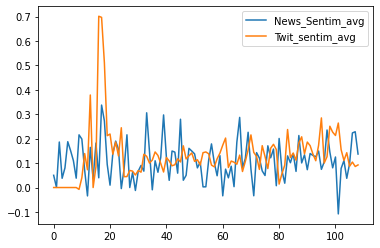

In [30]:
#plot of two sentiment 
plt.plot("News_Sentim_avg",data=date_2sentim_price)
plt.plot("Twit_sentim_avg",data=date_2sentim_price)
plt.legend()
plt.show()

## Correlation Inspection 

In [31]:
#news+twit sentiment vs close price 
np.corrcoef(date_2sentim_price['Close'],date_2sentim_price['Sentiment_newstwit'])

array([[1.        , 0.12986512],
       [0.12986512, 1.        ]])

### Regression sentiment vs lag1 price 

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [35]:
##function to change stock price change percentage into an indicator from 1-5 for classification model
## used a box plot to see the price change percentage range. 0.15 is the number. 
def pct_label(x):
    if x<=-0.15:
        return 0
    elif x >-0.15 and x<=-0.05:
        return 1
    elif x>-0.05 and x<0:
        return 2
    elif x==0:
        return 3
    elif x>0.05 and x<=0.15:
        return 4
    elif x>0.15:
        return 5
    else:
        return 0 


In [36]:
date_2sentim_price.head(1)

,Date,News_Sentim_avg,Open,High,Low,Close,Adj Close,Volume,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit
0,2019-10-01,0.050053,241.5,245.949997,239.130005,244.690002,244.690002,6162600,0.0,0.0,0.0,0.050053


In [37]:
#fewer number of unnecessary columns
regres_data=date_2sentim_price.drop(["Open","High","Low","Volume"],axis=1)
regres_data.head()

,Date,News_Sentim_avg,Close,Adj Close,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit
0,2019-10-01,0.050053,244.690002,244.690002,0.0,0.0,0.0,0.050053
1,2019-10-02,0.000617,243.130005,243.130005,0.0,0.0,0.0,0.000617
2,2019-10-03,0.186295,233.029999,233.029999,0.0,0.0,0.0,0.186295
3,2019-10-04,0.037832,231.429993,231.429993,0.0,0.0,0.0,0.037832
4,2019-10-07,0.080072,237.720001,237.720001,0.0,0.0,0.0,0.080072


In [38]:
regres_data['Diff_pct']=regres_data['Close'].diff(-1)/regres_data['Close']
regres_data.head()

,Date,News_Sentim_avg,Close,Adj Close,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit,Diff_pct
0,2019-10-01,0.050053,244.690002,244.690002,0.0,0.0,0.0,0.050053,0.006375
1,2019-10-02,0.000617,243.130005,243.130005,0.0,0.0,0.0,0.000617,0.041542
2,2019-10-03,0.186295,233.029999,233.029999,0.0,0.0,0.0,0.186295,0.006866
3,2019-10-04,0.037832,231.429993,231.429993,0.0,0.0,0.0,0.037832,-0.027179
4,2019-10-07,0.080072,237.720001,237.720001,0.0,0.0,0.0,0.080072,-0.009801


In [39]:
#use diff 
regres_data['Diff_pct_lag1']=regres_data['Diff_pct'].shift(-1)
#tried out other lags, lag 1 makes the most sense. 
# regres_data['Price_lag2']=regres_data['Diff'].shift(-2)
# regres_data['Price_lag3']=regres_data['Diff'].shift(-3)
# regres_data['Price_lag4']=regres_data['Diff'].shift(-4)
# regres_data['Price_lag5']=regres_data['Diff'].shift(-5)
# regres_data['Price_lag6']=regres_data['Diff'].shift(-6)
# regres_data['Price_lag7']=regres_data['Close'].shift(-7)
regres_data.dropna(inplace=True)
regres_data.head()

,Date,News_Sentim_avg,Close,Adj Close,retweet_count,num_tweets,Twit_sentim_avg,Sentiment_newstwit,Diff_pct,Diff_pct_lag1
0,2019-10-01,0.050053,244.690002,244.690002,0.0,0.0,0.0,0.050053,0.006375,0.041542
1,2019-10-02,0.000617,243.130005,243.130005,0.0,0.0,0.0,0.000617,0.041542,0.006866
2,2019-10-03,0.186295,233.029999,233.029999,0.0,0.0,0.0,0.186295,0.006866,-0.027179
3,2019-10-04,0.037832,231.429993,231.429993,0.0,0.0,0.0,0.037832,-0.027179,-0.009801
4,2019-10-07,0.080072,237.720001,237.720001,0.0,0.0,0.0,0.080072,-0.009801,-0.018663


In [40]:
linear_model = LinearRegression() 
X=regres_data[['News_Sentim_avg','Twit_sentim_avg','retweet_count','num_tweets']]
#X=regres_data.loc[:,'retweet_count':'Sentiment_added']
y=regres_data['Diff_pct_lag1'].apply(pct_label)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
reg_1 = LogisticRegression().fit(X_train, y_train)
reg_1.score(X_test, y_test)

C:\Users\49224\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5454545454545454

## Bonus: word cloud

In [41]:
import gensim
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
from wordcloud import WordCloud, STOPWORDS

In [42]:
len(paragraph_list)

806

In [43]:
warnings.filterwarnings(action = 'ignore') 
#  Reads  file 
#s = paragraph_list[0]
stop_words = stopwords.words('english')
# Replaces escape character with space 
datas=[]
for s in paragraph_list:
    f = s.replace("\n", " ") 
    data = [] 
    for i in sent_tokenize(f): 
        temp = [] 
        i=i.lower()
        filtered_temptext = [w.strip() for w in word_tokenize(i) if not w.strip() in stop_words]
        nopunc_temptext = [j.translate(str.maketrans('', '', string.punctuation)) for j in filtered_temptext]
        #review_dict_copy[i]=filtered_temptext
        x=[data.append(i) for i in nopunc_temptext]
    datas.append(data)
wordcloud_data=pd.DataFrame(datas)

In [44]:
def word_cloud(df):
    plt.subplots(figsize = (12,10))
    wordcloud = WordCloud(
            background_color = 'white',
            width = 1000,
            height = 800).generate(" ".join(df[0]))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show

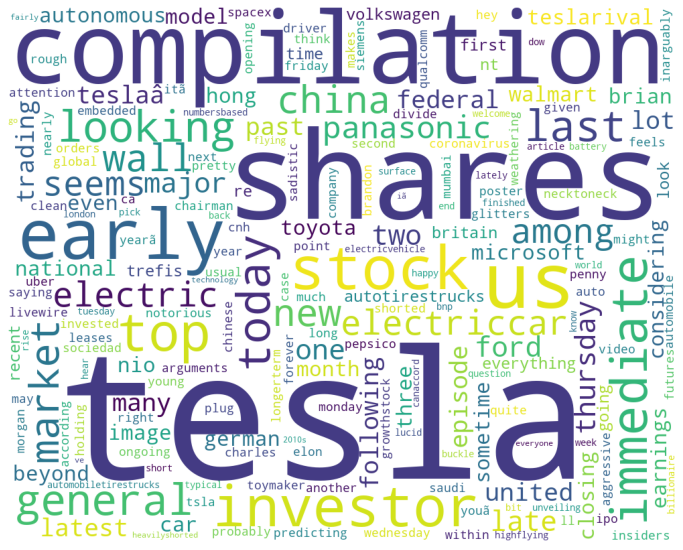

In [45]:
word_cloud(wordcloud_data)

## word2vec (Exploratory, not included in the report)

In [52]:

warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
  
#  Reads  file 
s = paragraph_list[0]
stop_words = stopwords.words('english')
# Replaces escape character with space 
f = s.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        #temp.append(j.lower()) 
        j=j.lower()
        #symbols = "!\"#$%&()*+-./:,;<=>?@[\]^_`{|}~\n'`"
        ##get rid of stop words and symbols 
        #s.translate(None, string.punctuation)
        filtered_temptext = j.translate(str.maketrans('', '', string.punctuation))
        #review_dict_copy[i]=filtered_temptext
        temp.append(filtered_temptext)
    data.append(temp) 
    
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 
  
# Print results 
print("Cosine similarity between 'tesla' " +
          "and 'good' - Skip Gram : ", 
    model2.similarity('tesla', 'good')) 
      
# print("Cosine similarity between 'alice' " +
#             "and 'machines' - Skip Gram : ", 
#       model2.similarity('alice', 'machines')) 


Cosine similarity between 'tesla' and 'good' - Skip Gram :  0.9993907


In [53]:
model2.most_similar(positive=['tesla'],negative=['stock'])

[('2', 0.05649084225296974),
 ('michael', 0.029592812061309814),
 ('disclosure', 0.02579793706536293),
 ('critical', 0.02451128512620926),
 ('disappear', 0.023333271965384483),
 ('summarizing', 0.023203667253255844),
 ('date', 0.022879965603351593),
 ('accounts', 0.022761356085538864),
 ('daimler', 0.02152874320745468),
 ('hello', 0.021471094340085983)]

In [54]:
model2.most_similar(positive=['tesla'])

[('most', 0.9996460676193237),
 ('things', 0.9996376037597656),
 ('has', 0.9996244311332703),
 ('spiffy', 0.999615490436554),
 ('like', 0.9996144771575928),
 ('actually', 0.9996127486228943),
 ('back', 0.999604344367981),
 ('thinking', 0.9996026754379272),
 ('my', 0.9995982646942139),
 ('would', 0.9995977878570557)]

## Doc2vec The main NLP mathod

### Prepare the data 

In [57]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize, word_tokenize 
import multiprocessing
cores = multiprocessing.cpu_count()
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from sklearn import utils
from sklearn.linear_model import LogisticRegression
import nltk
from sklearn.metrics import accuracy_score, f1_score

In [47]:
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [49]:
date_parag_df=pd.DataFrame(date_parag_pair.items())
date_parag_df.rename(columns={0:"Date",1:"paras"},inplace=True)
#date_parag_df=date_parag_df.set_index("Date")
date_parag_df.Date= pd.to_datetime(date_parag_df.Date)
price.Date = pd.to_datetime(price.Date)
##merge 

In [50]:
# date_parag_pair
date_parag_price_df = pd.merge(date_parag_df,
                 price,
                 on='Date',how='right')
len(date_parag_price_df)
date_parag_price_df=date_parag_price_df.fillna("")
# to see whether there is still null values 
date_parag_price_df[date_parag_price_df.isna().any(axis=1)] 

,Date,paras,Open,High,Low,Close,Adj Close,Volume


In [51]:
len(date_parag_price_df)

109

In [52]:
date_parag_price_df=date_parag_price_df.sort_values('Date')
#date_parag_price_df=date_parag_price_df.sort_values('Date')
date_parag_price_df.head()
date_parag_price_df['diff_pct']=date_parag_price_df['Close'].diff(-1)/date_parag_price_df['Close']
date_parag_price_df['Price_lag1']=date_parag_price_df['diff_pct'].shift(-1)
date_parag_price_df['labels'] = date_parag_price_df['Price_lag1'].apply(pct_label)
regres_data.dropna(inplace=True)
date_parag_price_df.head()
#parag_df['label']=np.arange(len(parag_df))
#parag_df.columns={"parag","labels"}
#parag_df.columns={"parag"}
#parag_df.head()

,Date,paras,Open,High,Low,Close,Adj Close,Volume,diff_pct,Price_lag1,labels
76,2019-10-01,Tesla Inc's electric Model 3 remained Norway's...,241.500000,245.949997,239.130005,244.690002,244.690002,6162600,0.006375,0.041542,0
6,2019-10-02,(RTTNews) - Tesla Inc. (TSLA) achieved record ...,243.289993,244.649994,239.429993,243.130005,243.130005,5631400,0.041542,0.006866,0
9,2019-10-03,Major benchmarks staged a big comeback on Thur...,231.860001,234.479996,224.279999,233.029999,233.029999,15084500,0.006866,-0.027179,2
23,2019-10-04,Shares of China’s electric car company Nio (NY...,231.610001,234.779999,228.070007,231.429993,231.429993,7995000,-0.027179,-0.009801,2
0,2019-10-07,PepsiCo (NASDAQ:) is planning to adopt Tesla (...,229.800003,238.559998,228.550003,237.720001,237.720001,8064200,-0.009801,-0.018663,2


In [53]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [54]:
train, test = train_test_split(date_parag_price_df, test_size=0.3, random_state=42)
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['paras']), tags=[r.labels]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['paras']), tags=[r.labels]), axis=1)

In [55]:
train_tagged.values[30]

TaggedDocument(words=['shares', 'of', 'tesla', 'nasdaq', 'tsla', 'jumped', 'on', 'thursday', 'rising', 'as', 'much', 'as', '19.7', 'as', 'of', '11:47', 'a.m.', 'edt', 'the', 'stock', 'was', 'up', '16.6', '.the', 'stock', "'s", 'gain', 'follows', 'the', 'company', "'s", 'third-quarter', 'results', 'which', 'featured', 'surprising', 'profit', 'in', 'addition', 'the', 'company', "'s", 'free', 'cash', 'flow', 'was', 'much', 'higher', 'than', 'anticipated.image', 'source', 'getty', 'images.in', 'its', 'third', 'quarter', 'the', 'electric-car', 'company', 'reported', 'non-gaap', 'adjusted', 'earnings', 'per', 'share', 'of', '1.86', '--', 'well', 'ahead', 'of', 'an', 'average', 'analyst', 'estimate', 'for', 'loss', 'per', 'share', 'of', '0.42', 'free', 'cash', 'flow', 'similarly', 'crushed', 'analyst', 'estimates', 'coming', 'in', 'at', '371', 'million', 'on', 'average', 'analysts', 'had', 'expected', 'tesla', 'to', 'report', 'free', 'cash', 'flow', 'of', '32', 'million', 'another', 'quarter'

### 1st Doc2vec Model: DBOW Model

In [58]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 76/76 [00:00<?, ?it/s]


In [59]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 76/76 [00:00<?, ?it/s]


Wall time: 1.1 s


In [60]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [61]:
len(X_train)

85

In [68]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.5757575757575758
Testing F1 score: 0.553939393939394


### 2nd Model: DM Model

In [64]:
model_dmm = Doc2Vec(dm=1, dm_mean=1, vector_size=300, window=10, negative=5, min_count=1, workers=5, alpha=0.065, min_alpha=0.065)
model_dmm.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████| 76/76 [00:00<?, ?it/s]


In [65]:
%%time
for epoch in range(30):
    model_dmm.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dmm.alpha -= 0.002
    model_dmm.min_alpha = model_dmm.alpha

100%|██████████| 76/76 [00:00<?, ?it/s]


Wall time: 2.01 s


In [67]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.45454545454545453
Testing F1 score: 0.39212779973649536
